In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country_df = pd.read_csv('./dataset/countries.csv')
ba_df = pd.read_csv('./dataset/ba_reviews.csv')

In [3]:
ba_df

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,service was mediocre at best,Gary Storer,03/10/2023,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,01/10/2023,no,Not Verified,2,2,3,1,2,2,-1
1,BA standards continue to decline,A Jensen,02/10/2023,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,01/09/2023,no,Verified,2,2,1,2,1,1,-1
2,"won the race to the bottom""",John Rockett,02/10/2023,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,01/09/2023,no,Not Verified,2,2,3,2,1,1,-1
3,Not a reliable airline,Tatiana Bobrovskaya,02/10/2023,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,01/10/2023,no,Verified,3,4,4,2,1,1,-1
4,Very disappointed,Tom Slowbe,28/09/2023,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,01/09/2023,no,Verified,1,1,4,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,seat let down very good flight,Gregory Martinez,26/03/2016,United Kingdom,Barcelona to Seoul Incheon via London Heathr...,Boeing 787,Solo Leisure,Economy Class,BCN to SEL via LHR,01/03/2016,yes,Verified,8,3,4,4,4,5,4
1320,friendly and efficient service,Philip Djaferis,25/03/2016,Switzerland,London Heathrow to Houston on British Airway...,Boeing 777-200,Couple Leisure,Economy Class,LHR to IAH,01/03/2016,yes,Verified,8,3,5,4,4,4,4
1321,BA.com been truly appalling,Joanne Le Bon,24/03/2016,United Kingdom,We have flown with British Airways over 100 ...,Boeing 747-400,Couple Leisure,First Class,LHR to DEN,01/03/2016,no,Verified,8,3,4,3,4,2,3
1322,overall experience was pleasant,J Lawrence,23/03/2016,South Africa,British Airways from Seattle to Johannesburg...,Boeing 747-400 /A380,Solo Leisure,Economy Class,SEA to JNB via LHR,01/03/2016,yes,Verified,8,3,4,4,4,4,2


In [4]:
country_df.isna().sum()
ba_df.isna().sum()

header                 0
author                 0
date                   0
place                  0
content                0
aircraft               0
traveller_type         1
seat_type              0
route                  0
date_flown             0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64

In [5]:
ba_df.dropna(inplace=True)
country_df.dropna(inplace=True)

In [6]:
# duplicates
ba_df.duplicated().sum(), country_df.duplicated().sum()

(np.int64(0), np.int64(0))

In [7]:

ba_df['date_flown'] = pd.to_datetime(ba_df['date_flown'], format = '%d/%m/%Y') 
ba_df['date'] = pd.to_datetime(ba_df['date'], format = '%d/%m/%Y') 
ba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   header               1323 non-null   object        
 1   author               1323 non-null   object        
 2   date                 1323 non-null   datetime64[ns]
 3   place                1323 non-null   object        
 4   content              1323 non-null   object        
 5   aircraft             1323 non-null   object        
 6   traveller_type       1323 non-null   object        
 7   seat_type            1323 non-null   object        
 8   route                1323 non-null   object        
 9   date_flown           1323 non-null   datetime64[ns]
 10  recommended          1323 non-null   object        
 11  trip_verified        1323 non-null   object        
 12  rating               1323 non-null   int64         
 13  seat_comfort         1323 non-null   i

In [8]:
ba_df['date'].max()

Timestamp('2023-10-03 00:00:00')

## Validation
1. filling null country code in counrty table eg. country code of sark is "CRQ"
2. review_date should not be less than flowndate
3. 

In [9]:
country_df['Code'] = country_df.apply(lambda x: 'CRQ' if x['Country'] == 'Sark' else x['Code'], axis = 1)
# code of sark is 'CRQ'
ba_df[ba_df['date'] < ba_df['date_flown']]

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment


## Transformation

1. creating seperate columns for via route wont help in analysis because we dont have enough information on it eg. layover time, airport name, etc
2. connecting_flights = if there is any layover during flight
3.

In [10]:
ba_df['connecting_flights'] = ba_df['route'].str.contains('via').astype(int)
ba_df.head()

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment,connecting_flights
0,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,no,Not Verified,2,2,3,1,2,2,-1,1
1,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,no,Verified,2,2,1,2,1,1,-1,0
2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,no,Not Verified,2,2,3,2,1,1,-1,0
3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,no,Verified,3,4,4,2,1,1,-1,0
4,Very disappointed,Tom Slowbe,2023-09-28,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,2023-09-01,no,Verified,1,1,4,4,3,2,3,1


In [11]:
ba_df.describe()

,date,date_flown,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment,connecting_flights
count,1323,1323,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,2018-12-17 17:52:06.530612224,2018-11-16 15:46:56.326530560,4.191232,2.871504,3.281935,2.382464,3.033258,2.779289,1.436130,0.130763
min,2016-03-23 00:00:00,2015-05-01 00:00:00,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000
25%,2017-04-20 12:00:00,2017-04-01 00:00:00,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
50%,2018-05-14 00:00:00,2018-05-01 00:00:00,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,1.000000,0.000000
75%,2019-11-17 00:00:00,2019-11-01 00:00:00,7.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000
max,2023-10-03 00:00:00,2023-10-01 00:00:00,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
std,NaN,NaN,3.253372,1.385618,1.519873,1.698195,1.405236,1.409271,2.097357,0.337269


Text(0.5, 0, 'rating')

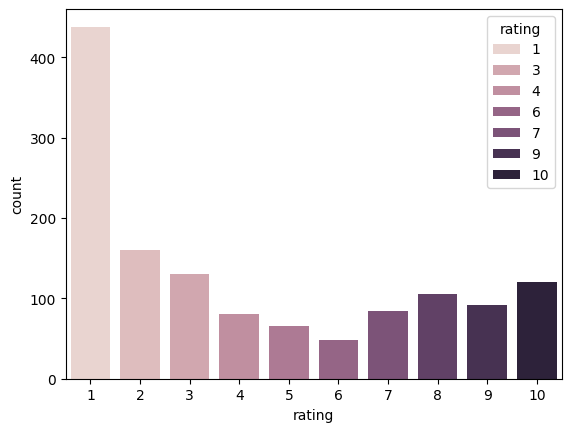

In [12]:
#analysis

sns.countplot(data = ba_df, x = 'rating', hue = 'rating')
plt.xlabel('rating')

In [13]:
#data is super skewed to the right side. which suggest that overall rating of Airline is in negative

In [14]:
verified_df = ba_df[ba_df['trip_verified'] == 'Verified']
unverified_df = ba_df[ba_df['trip_verified'] == 'Not Verified']
verified_df.size / unverified_df.size

11.137614678899082

Text(0.5, 1.0, 'Unverified User Airline Review')

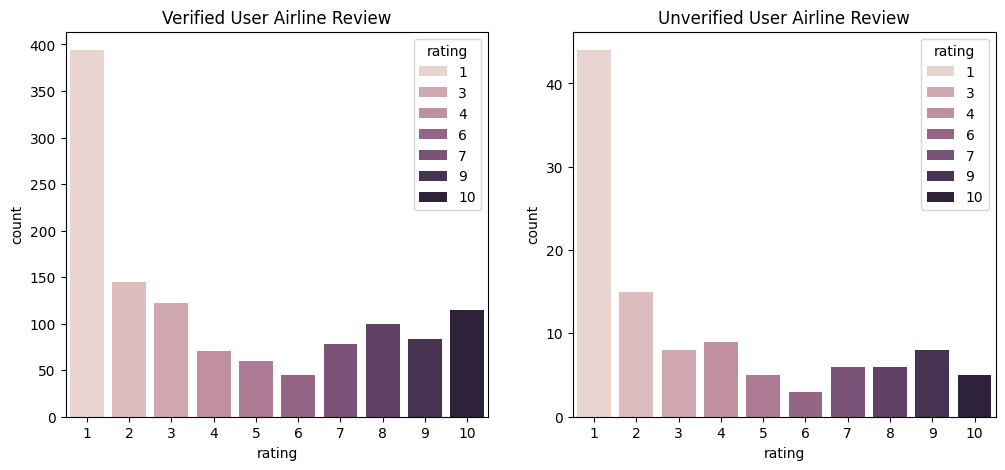

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(data = verified_df, x = 'rating', hue = 'rating', ax = ax[0])
ax[0].set_title("Verified User Airline Review")
sns.countplot(data = unverified_df, x = 'rating', hue = 'rating', ax = ax[1])
ax[1].set_title("Unverified User Airline Review")

In [16]:

# we will use chi-square test for homogenity to check distribution 

from scipy.stats import chi2_contingency

counts1 = verified_df['rating'].value_counts()
counts2 = unverified_df['rating'].value_counts()
contingency_table = pd.DataFrame([counts1, counts2]).fillna(0)

chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject H0: The distributions are significantly different.")
else:
    print("Fail to reject H0: No significant difference found.")

Fail to reject H0: No significant difference found.


In [17]:
# skewness in varified rating is more significant. same can be said for unverified but not that much
#So both columns follow same distribution. 

In [18]:
# Lets see if seat type affects the rating
ba_df['seat_type'].unique()

economy_seat = ba_df[ba_df['seat_type'] == 'Economy Class']
business_seat = ba_df[ba_df['seat_type'] == 'Business Class']
first_seat = ba_df[ba_df['seat_type'] == 'First Class']
premium_seat = ba_df[ba_df['seat_type'] == 'Premium Economy']
economy_seat.size, business_seat.size, first_seat.size, premium_seat.size

(12060, 10020, 1740, 2640)

Fail to reject H0: No significant difference found.


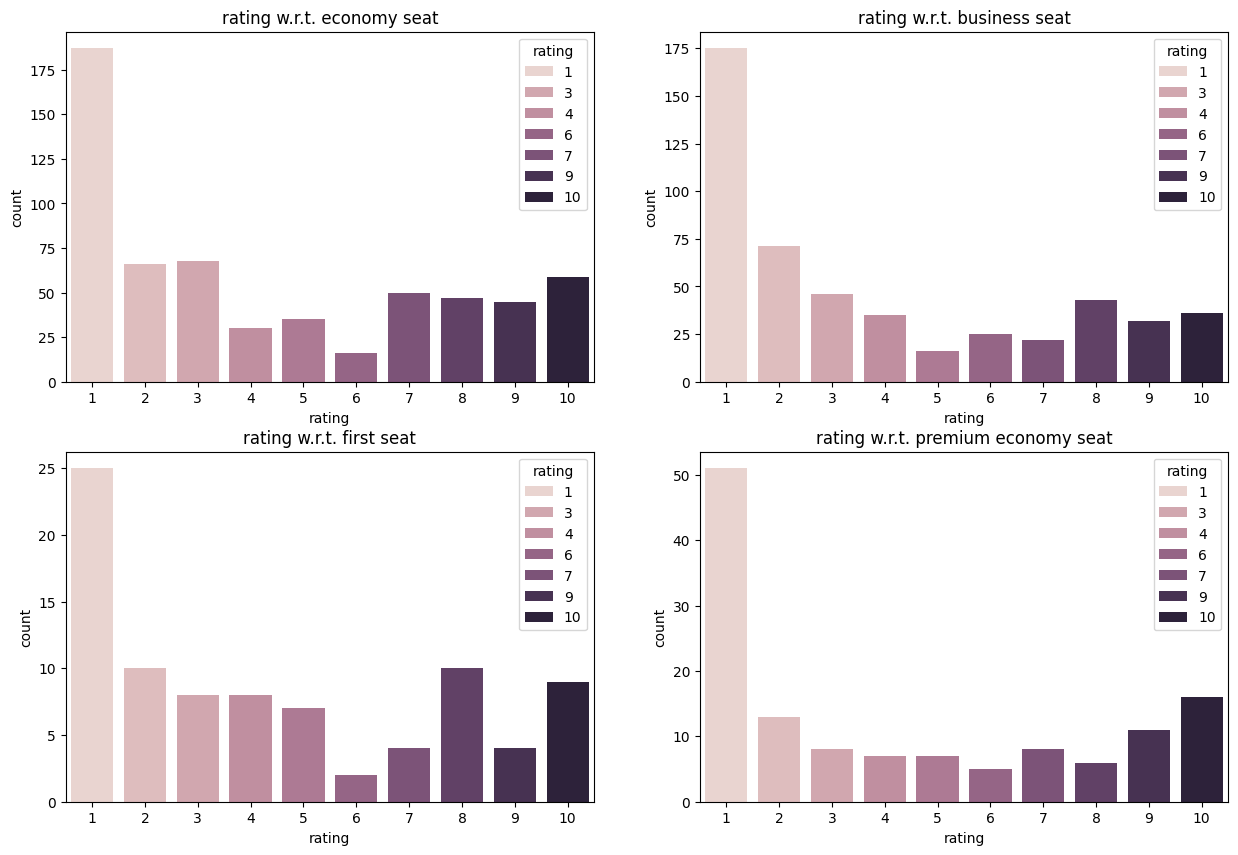

In [19]:


fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data = economy_seat, x = 'rating', hue = 'rating', ax = ax[0, 0])
ax[0,0].set_title('rating w.r.t. economy seat')
sns.countplot(data = business_seat, x = 'rating', hue = 'rating',ax = ax[0, 1])
ax[0,1].set_title('rating w.r.t. business seat')
sns.countplot(data = first_seat, x = 'rating', hue = 'rating', ax = ax[1, 0])
ax[1,0].set_title('rating w.r.t. first seat')
sns.countplot(data = premium_seat, x = 'rating', hue = 'rating', ax = ax[1, 1])
ax[1,1].set_title('rating w.r.t. premium economy seat')

# we will use chi-square test for homogenity to check distribution 
counts1 = verified_df['rating'].value_counts()
counts2 = unverified_df['rating'].value_counts()
counts3 = verified_df['rating'].value_counts()
counts4 = unverified_df['rating'].value_counts()

contingency_table = pd.DataFrame([counts1, counts2, counts3, counts4]).fillna(0)

chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject H0: The distributions are significantly different.")
else:
    print("Fail to reject H0: No significant difference found.")

In [20]:
# with the help of plot and chi-square test for homogeneity. We can conclude that there is no correlation between seat_type and rating

Text(0.5, 1.0, 'Box Plot of Reviews for each service')

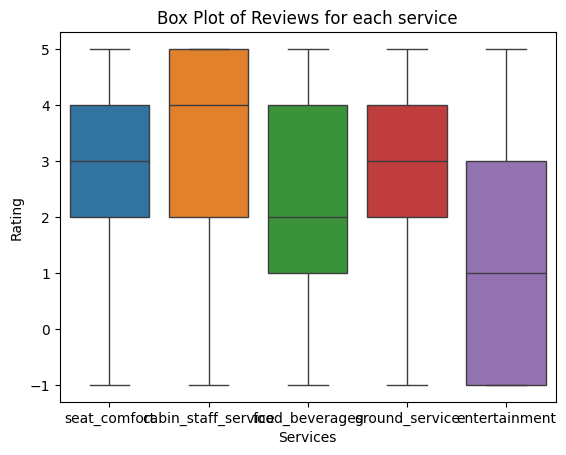

In [21]:

service_df = ba_df[['seat_comfort', 'cabin_staff_service', 'food_beverages', 'ground_service', 'entertainment']]
sns.boxplot(data=service_df)
plt.xlabel('Services')
plt.ylabel('Rating')
plt.title('Box Plot of Reviews for each service')

In [22]:
# cabin_staff have best performance in this list with 75% people gave it 2/5 and more than 50% consider it 4/5 
# seat_comfort have 2nd best performance with 75% people consider it as avg and 50% of people gave it rating of more than 3/5
# ground_service also share same performance same of seat_comfort.
# entertainment has the lowest rating of all where 50% people consider it as 1/5 and only 25% consider it as 4/5

<Axes: >

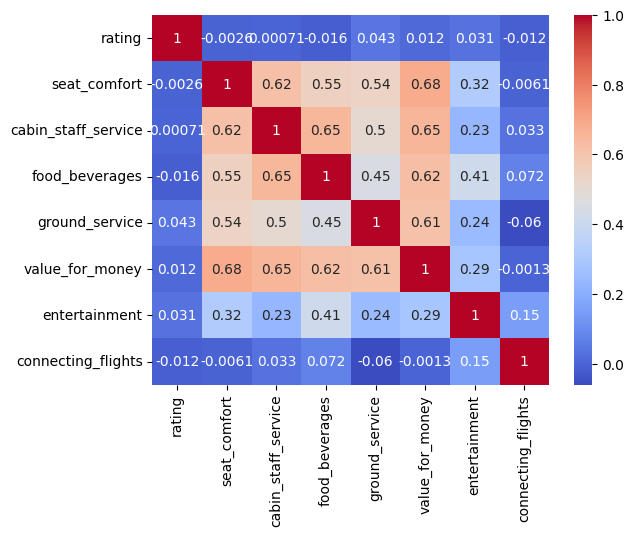

In [23]:
corr_df = ba_df.corr(numeric_only=True)
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

1. Overall rating has near-zero correlation with service metrics
note: Treat rating cautiously; it may be noisy or subjective.

2. Strong correlation among core service variables (0.5–0.7)
note: Seat comfort, cabin staff, food, ground service move together which shows multicollinearity.

3. Value for money is the strongest connector
Note: Highly correlated with most service scores; reflects overall experience.

4. Seat comfort and cabin staff stand out
Note: Among the highest correlations with other services these are core experience drivers.

5. Entertainment is a secondary factor
Note: Weaker correlations; not a primary lever for satisfaction.

6. Connecting flights show minimal impact
Note: No meaningful correlation with rating or service scores means it is not a key driver here.

In [25]:
country_df.to_csv('./dataset/new_country.csv', index=False)
ba_df.to_csv('./dataset/new_reviews.csv', index=False)